<div style="font-family:verdana; color:#2E8B57;font-size:14px;font-style:italic"># Question 1</div>
<strong>1. Supervised learning</strong><br>
Supervised learning is a type of machine learning where the algorithm learns from labeled data, which means each input data point is associated with its corresponding output label.<br>
<strong>2. Unsupervised learning</strong><br>
Unsupervised learning is a type of machine learning where the algorithm learns from unlabeled data, meaning there are no predefined labels associated with the input data<br>
<strong>3. Classification</strong><br>
Classification is a type of supervised learning task where the goal is to predict the categorical class labels of new instances based on past observations.<br>
<strong>4. Regression</strong><br>
Regression is a type of supervised learning task where the goal is to predict continuous numerical values based on input features<br>
<strong>5. Clustering</strong><br> 
Clustering is a type of unsupervised learning task where the goal is to partition a set of data points into groups or clusters based on the similarity or proximity of the data points to each other. 

Basic Statistics of the Dataset:
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude          MEDV  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  

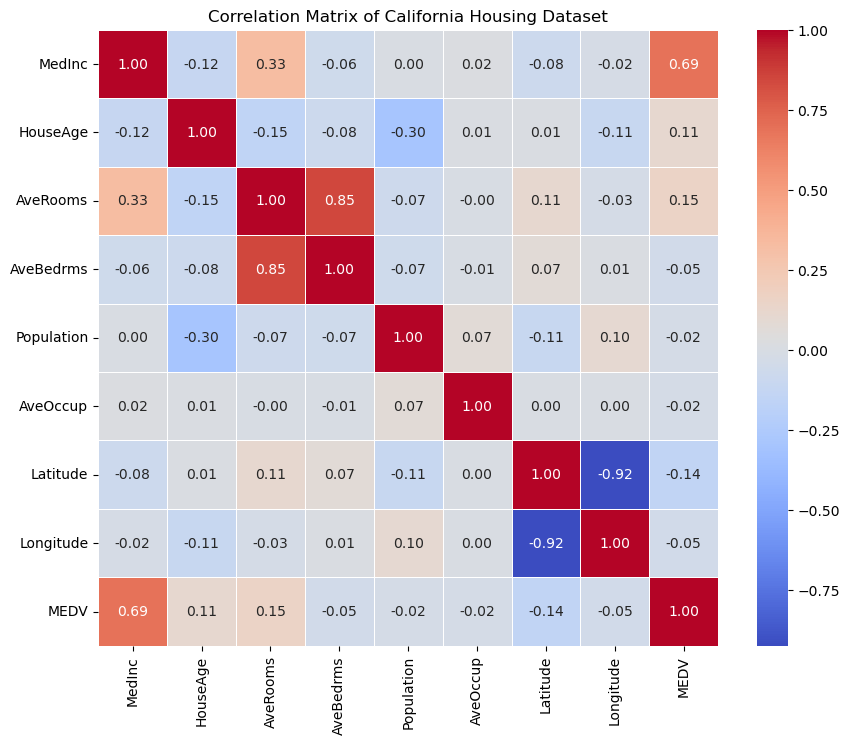

<Figure size 1200x1000 with 0 Axes>

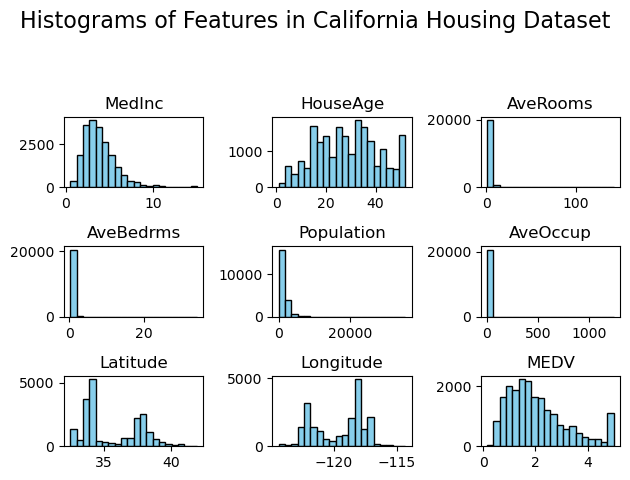

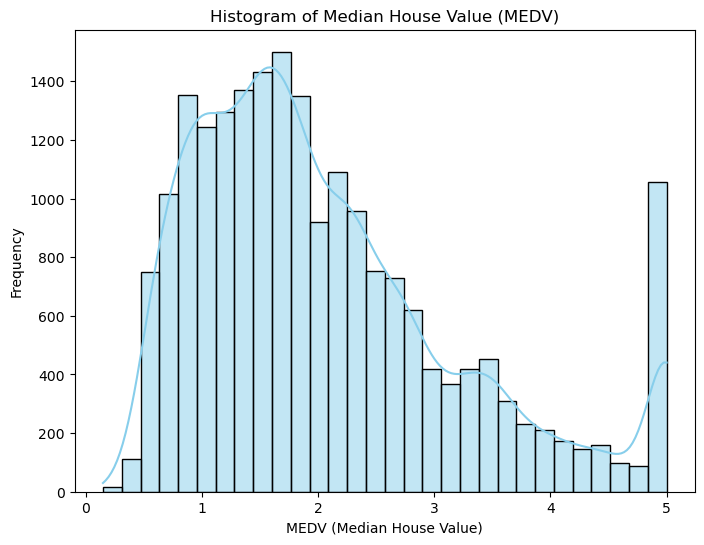

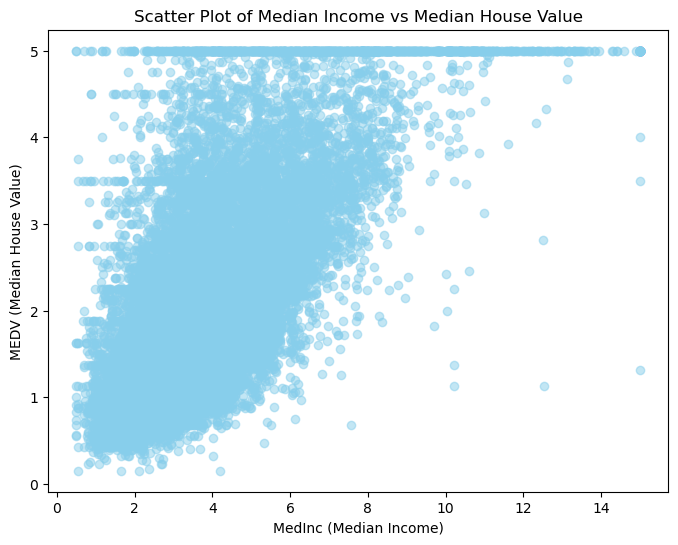

In [19]:
# Question 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()

housing_df = pd.DataFrame(data=np.c_[housing.data, housing.target], columns=housing.feature_names + ['MEDV'])

print("Basic Statistics of the Dataset:")
print(housing_df.describe())

plt.figure(figsize=(10, 8))
sns.heatmap(housing_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix of California Housing Dataset')
plt.show()

plt.figure(figsize=(12, 10))
housing_df.hist(bins=20, color='skyblue', edgecolor='black', grid=False)
plt.suptitle('Histograms of Features in California Housing Dataset', x=0.5, y=1.02, fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

plt.figure(figsize=(8, 6))
sns.histplot(housing_df['MEDV'], kde=True, color='skyblue', bins=30)
plt.title('Histogram of Median House Value (MEDV)')
plt.xlabel('MEDV (Median House Value)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(housing_df['MedInc'], housing_df['MEDV'], color='skyblue', alpha=0.5)
plt.title('Scatter Plot of Median Income vs Median House Value')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('MEDV (Median House Value)')
plt.show()



Intercept: 0.4445972916907832
Coefficient (MedInc): 0.4193384939381278


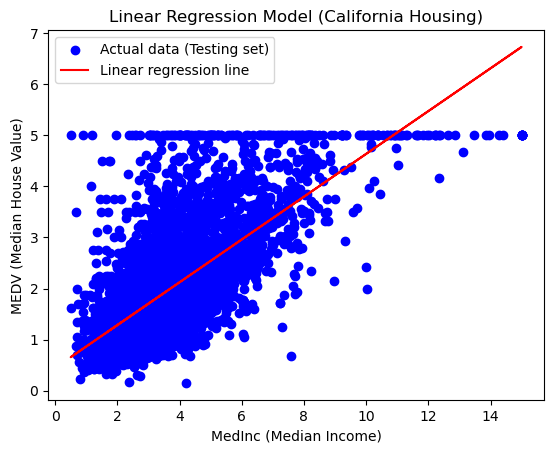

In [20]:
# Question 2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split

housing = fetch_california_housing()

housing_df = pd.DataFrame(data=np.c_[housing.data, housing.target], columns=housing.feature_names + ['MEDV'])

X = housing_df['MedInc'].values.reshape(-1, 1)  # Feature: MedInc (median income in block)
y = housing_df['MEDV'].values  # Target variable: MEDV (median house value)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = np.concatenate([np.ones((X_train.shape[0], 1)), X_train], axis=1)
X_test = np.concatenate([np.ones((X_test.shape[0], 1)), X_test], axis=1)

theta = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print("Intercept:", theta[0])
print("Coefficient (MedInc):", theta[1])

predictions_train = X_train.dot(theta)
predictions_test = X_test.dot(theta)


plt.scatter(X_test[:, 1], y_test, color='blue', label='Actual data (Testing set)')
plt.plot(X_test[:, 1], predictions_test, color='red', label='Linear regression line')
plt.xlabel('MedInc (Median Income)')
plt.ylabel('MEDV (Median House Value)')
plt.title('Linear Regression Model (California Housing)')
plt.legend()
plt.show()


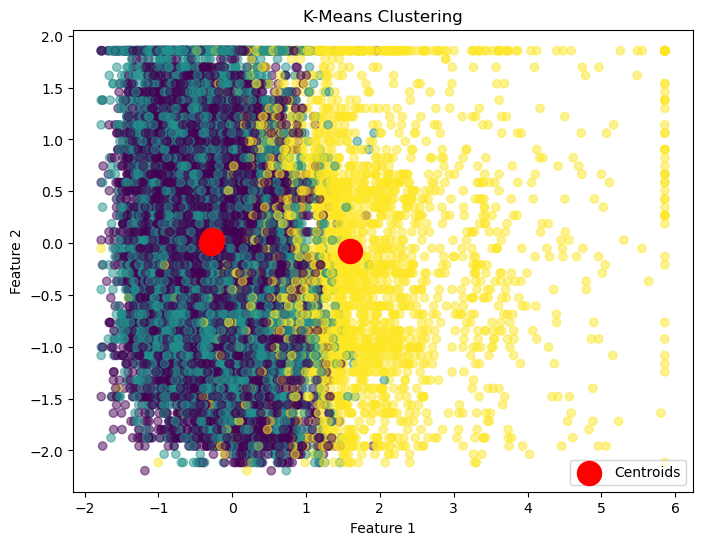

In [25]:
# Question 4
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

housing_df = pd.DataFrame(data=np.c_[housing.data, housing.target], columns=housing.feature_names + ['MEDV'])

scaler = StandardScaler()
X_scaled = scaler.fit_transform(housing_df)

def initialize_centroids(X, k):
    np.random.shuffle(X)
    return X[:k]

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

def assign_clusters(X, centroids):
    clusters = []
    for point in X:
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        cluster = np.argmin(distances)
        clusters.append(cluster)
    return np.array(clusters)

def update_centroids(X, clusters, k):
    centroids = []
    for cluster in range(k):
        cluster_points = X[clusters == cluster]
        centroid = np.mean(cluster_points, axis=0)
        centroids.append(centroid)
    return np.array(centroids)

def kmeans(X, k, max_iters=100):
    centroids = initialize_centroids(X, k)
    
    for _ in range(max_iters):
        clusters = assign_clusters(X, centroids)
        new_centroids = update_centroids(X, clusters, k)
        
        if np.allclose(new_centroids, centroids):
            break
        
        centroids = new_centroids
    
    return clusters, centroids

k = 3
clusters, centroids = kmeans(X_scaled, k)

plt.figure(figsize=(8, 6))
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=300, c='red', label='Centroids')
plt.title('K-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.show()

